# Implementation of the streaming operator

In [2]:
import matplotlib.pyplot as plt
from milestones.m1 import plt_helper

# Test the streaming operator
This notebook lets you test the streaming operator in 2d.
It supports streaming in one direction only. Use the param `streaming_direction` to set the value as wished.

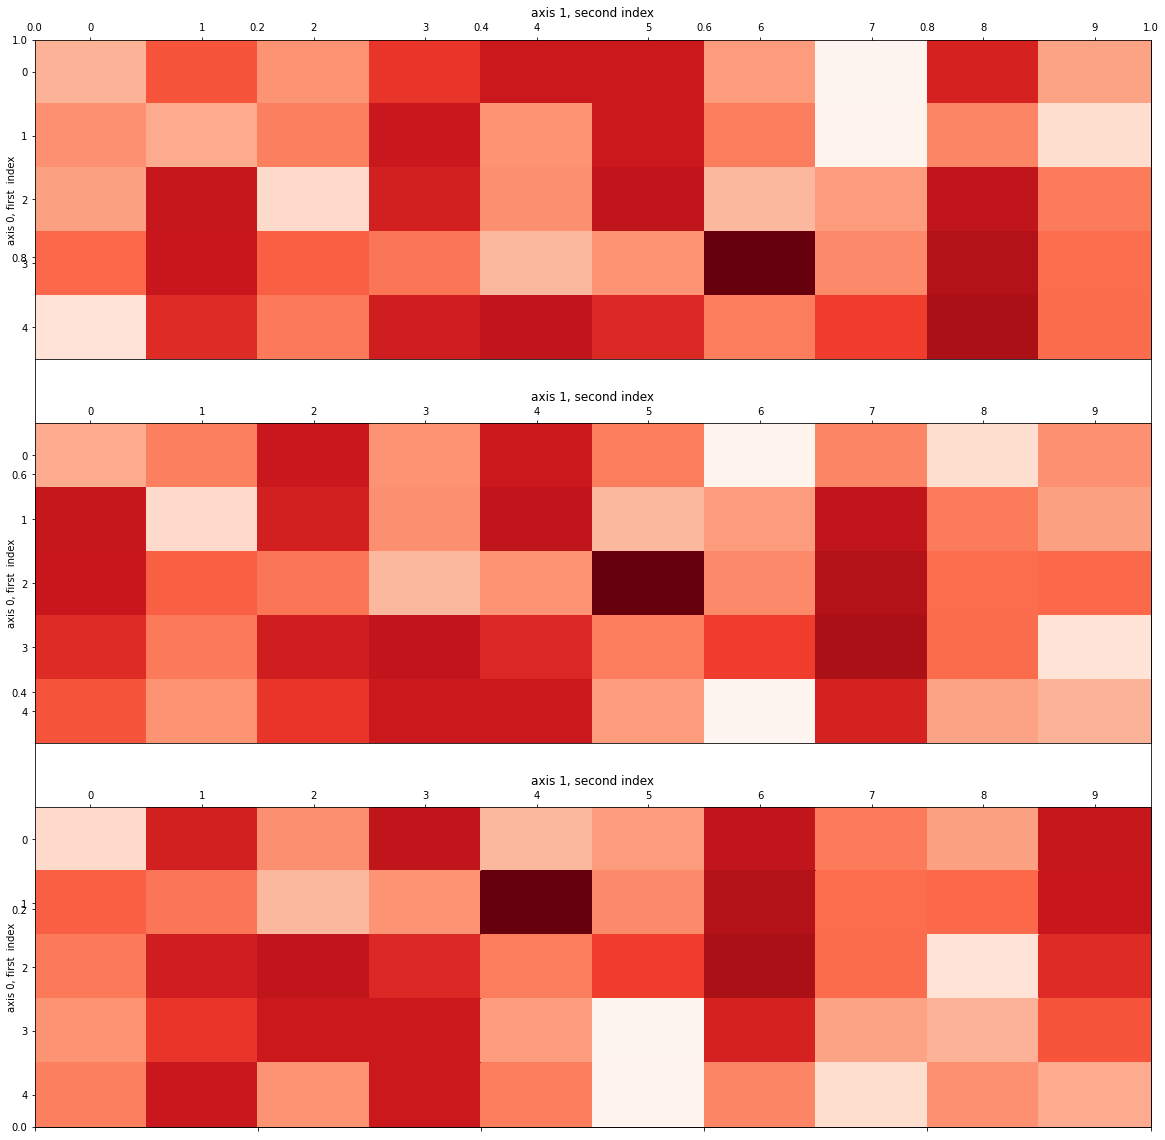

In [3]:
%matplotlib inline

streaming_direction = 7

plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
fig, ax = plt.subplots(figsize=(20, 20))
fig = plt_helper.plot_streaming(fig=fig, streaming_direction=streaming_direction)
plt.show(fig)